# **Smart HR Analytics- Employee Attrition Insights in Consulting Firms using Predictive Modeling**

### **Introduction**  
This project focuses on analyzing a dataset to build predictive models aimed at providing actionable insights for the Human Resources (HR) department of a large consulting firm. As part of the project, I will predict whether an employee is likely to leave the company using either a regression model or a machine learning model. Leveraging my prior knowledge and skills, I aim to design a robust solution that not only addresses the problem effectively but also showcases my ability to apply data analysis and predictive modeling techniques in a real-world scenario. 

This project culminates in two key deliverables:  
1. A concise, one-page summary tailored for external stakeholders, serving as a professional artifact demonstrating my role as a data professional.  
2. A comprehensive code notebook that details the end-to-end process of the analysis and modeling, providing a technical reference for my approach.  

### **Deliverables**  
- **Model Evaluation and Interpretation**: A thorough evaluation of the chosen predictive model, including its performance metrics and insights derived from the results.  
- **Data Visualization**: Meaningful visualizations directly linked to the project question, providing clarity and enhancing stakeholder understanding.  
- **Ethical Considerations**: An assessment of ethical implications related to data usage and modeling outcomes.  
- **Resource Documentation**: A detailed account of resources and troubleshooting techniques utilized during the project.  

This project highlights my ability to conduct data-driven problem-solving while adhering to industry standards and ethical practices.

# **PACE stages**


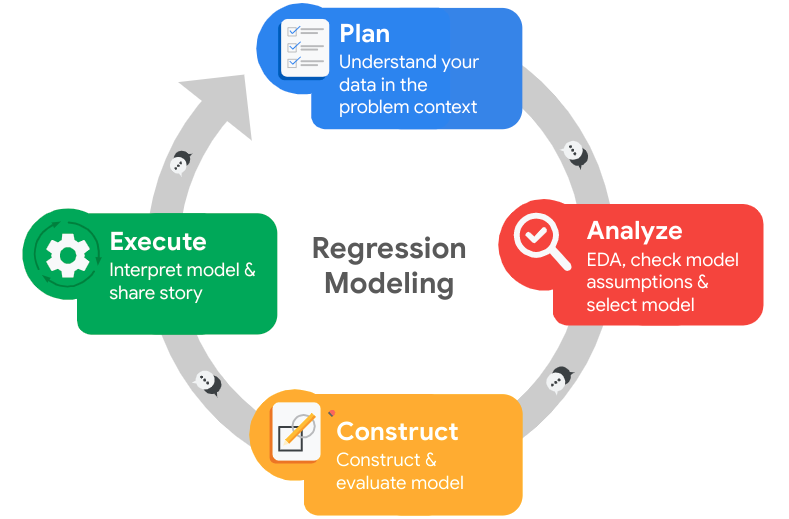

## `P`ACE: Plan

This stage focuses on defining objectives and developing strategies to address employee satisfaction and attrition.

### **1. Analyze HR Data for Key Insights**  
- Explore HR data to identify critical factors influencing employee satisfaction and turnover.

### **2. Build a Predictive Model for Attrition**  
- Develop a model to predict the likelihood of employee attrition based on key factors.

### **3. Identify Key Drivers of Employee Turnover**  
- Pinpoint the main drivers of attrition to target specific areas for improvement.

### **4. Provide Actionable Insights for Retention**  
- Offer practical recommendations to enhance employee retention and reduce hiring costs.

### **5. Focus on Improving Workplace Satisfaction**  
- Suggest strategies to boost workplace engagement and overall job satisfaction, ensuring a more positive employee experience.

This approach ensures that the planning stage is focused on addressing the root causes of employee turnover and creating actionable steps to improve retention.


### After discovering data set following are the important things to mention.

---

### Project Overview  
The purpose of this project is to analyze the HR dataset to uncover insights about employee satisfaction, productivity, and retention. By exploring various factors affecting employee behavior, the analysis aims to predict potential attrition and help HR teams create better workplace strategies. 

---

### Stakeholders  
This project focuses on the following stakeholders:  
1. **HR Managers and Executives**: They need actionable insights to improve retention and employee satisfaction, as well as optimize HR policies.  
2. **Employees**: While not directly involved, they stand to benefit from improved workplace conditions, career growth opportunities, and engagement initiatives.

---

### Objectives  
The primary goals of this project are:  
- To identify key factors influencing employee satisfaction, productivity, and attrition.  
- To predict which employees are at a higher risk of leaving the organization.  
- To provide recommendations for reducing attrition and improving overall employee experience.  

Ultimately, this project seeks to empower HR teams with data-driven insights to make strategic decisions.

---

### Initial Observations  
After exploring the dataset, a few initial insights have emerged:  
- Variables such as `satisfaction_level`, `last_evaluation`, and `average_monthly_hours` appear critical in understanding employee performance and satisfaction.  
- Factors like `Work_accident` and `promotion_last_5years` may contribute to whether employees feel valued and engaged.  
- The `left` variable is binary and can serve as the target variable for predictive modeling to identify at-risk employees.  

These observations suggest that the dataset is well-suited for building descriptive and predictive analytics models.

---

### Ethical Considerations  
Ethics play a critical role in this project, and the following measures are taken:  
- **Employee Privacy**: Ensure that no identifiable or sensitive information about employees is revealed during the analysis.  
- **Avoiding Bias**: Ensure fairness across all employee groups, avoiding bias based on departments, salary, or tenure.  
- **Transparency**: Results will be communicated clearly and responsibly to avoid misinterpretation by stakeholders.  

By adhering to these ethical standards, the analysis will remain fair, unbiased, and beneficial for all involved.





## Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 

import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

#we need to see all the column without truncate any
pd.set_option('display.max_columns',None)

# Data modeling 
from xgboost import XGBClassifier 
from xgboost import XGBRegressor 
from xgboost import plot_importance 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 

# Function and metrices 
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,confusion_matrix,\
ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve 
from sklearn.tree import plot_tree 

import pickle 



### Load dataset

* let's load the dataset


In [2]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")

df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data Exploration

In this stage, we are going to understand our variables and clean up our messy dataset for better analysis.



### Basic information about the data

In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Descriptive statistics about the data

In [4]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

Standardizing column names to `snake_case`, correcting errors, and making them concise ensures consistency, improves readability, and simplifies data access for efficient analysis.

In [5]:
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0 = df0.rename(columns={'average_montly_hours': 'average_monthly_hours',
                          'Work_accident': 'work_accident',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})


#New columns 
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
print("Number of duplicate value is:",df0.duplicated().sum())


Number of duplicate value is: 3008


In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


The output shows the first five duplicated rows in the dataframe. It's highly unlikely these are legitimate entries, as the probability of two employees reporting identical responses across all columns is minimal, especially with continuous variables in 10 columns. Proceed by dropping these duplicates.

In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

It would be helpful to investigate how many rows in the data contain outliers in the tenure column.

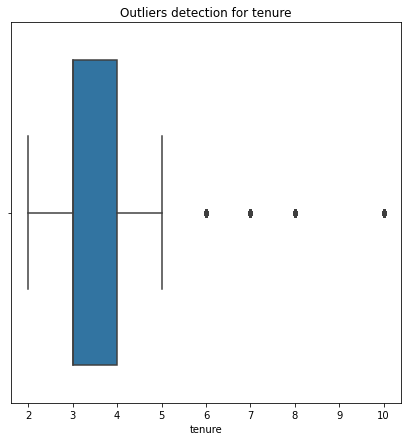

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize= (7,7))
plt.title('Outliers detection for tenure',fontsize=12)
plt.xticks()
plt.yticks()
sns.boxplot(x=df1['tenure'])
plt.show()




Below code uses the **Interquartile Range (IQR) method** to detect outliers in the `tenure` column:
1. Calculates Q1, Q3, and IQR.
2. Defines the upper and lower limits for non-outlier values using `1.5 * IQR`.
3. Identifies rows with `tenure` values outside these limits as outliers.
4. Counts the number of rows containing outliers and prints the result.

In [12]:
percentile25 = df1['tenure'].quantile(0.25)
percentile75 = df1['tenure'].quantile(0.75)
iqr = percentile75 - percentile25

lower_limit = percentile25 - 1.5 * iqr
upper_limit = percentile75 + 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

outliers = df1[(df1['tenure']<lower_limit) | (df1['tenure']>upper_limit)]
print('number of rows that containing outliers are:', len(outliers))


Lower limit: 1.5
Upper limit: 5.5
number of rows that containing outliers are: 824


# P`A`CE: Analyze Stage

This stage focuses on exploring the data to uncover insights and relationships between variables.

### **1. Conduct Exploratory Data Analysis (EDA)**  
- Perform a thorough analysis of the dataset to understand its structure, distributions, and key patterns.

### **2. Analyze Variable Relationships**  
- Investigate how different variables are related to one another to identify trends, correlations, and potential features for modeling.

### **3. Identify Data Quality Issues**  
- Detect missing values, outliers, and inconsistencies that may impact model performance.

### **4. Visualize Key Insights**  
- Use plots, charts, and graphs to reveal relationships between variables and highlight important patterns.

### **5. Prepare Data for Modeling**  
- Transform, clean, and engineer features based on EDA findings to optimize the dataset for the next stages.  

This approach ensures a comprehensive understanding of the data, providing a solid foundation for modeling.

### Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
print(df1['left'].value_counts())
print()
print(df1['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64


*This indicates that 83% of people stayed and 17% left.*

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data. 

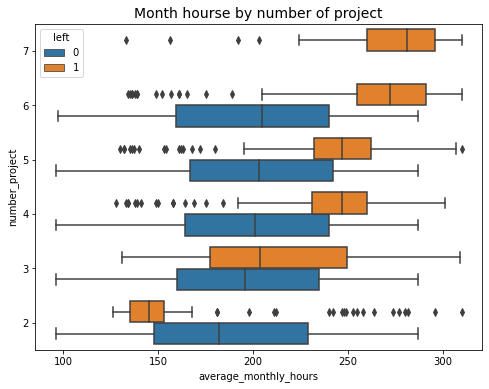

In [14]:
fig, ax = plt.subplots(figsize =(8,6))
sns.boxplot(data = df1, x='average_monthly_hours',y='number_project',hue='left',orient="h",ax = ax)
ax.set_title('Month hourse by number of project', fontsize ='14')
ax.invert_yaxis()
plt.show()

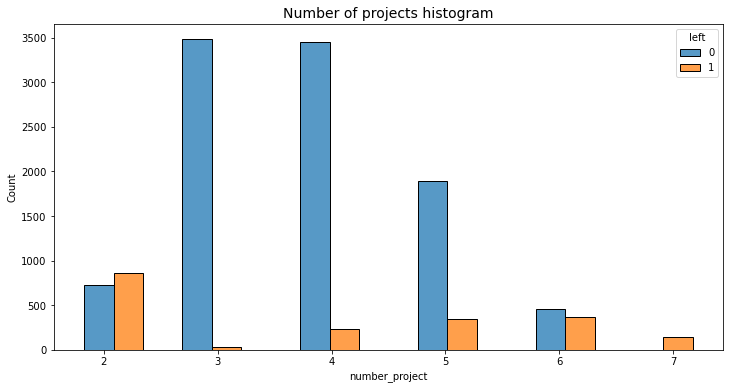

In [16]:
fig, ax = plt.subplots(figsize = (12,6))
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x ='number_project', hue='left',multiple='dodge', shrink=3,ax=ax)
ax.set_title('Number of projects histogram', fontsize='14')
plt.show()

**Observations:**

* Employees who worked on more projects tended to work longer hours.
* Two distinct groups of employees who left:
    * Group A: Worked significantly less than their peers with the same number of projects (possible reasons: fired, already given notice and assigned fewer hours).
    * Group B: Worked significantly more than their peers with the same number of projects (possible reason: quit due to high workload).
* Everyone with seven projects left the company.
* Optimal number of projects for employees seems to be 3-4 (low left/stayed ratio).
* All groups worked considerably more than the average working hours per month (166.67).
    *Steps to Calculate*

##### **Step 1: Total working hours in a year**
An employee works **40 hours per week** for **50 weeks**:
     
     * 40hours/week x 50weeks/year = 2000 hours/year

#### **Step 2: Average working hours per month**
There are **12 months in a year**, so we divide the total hours worked in a year by 12:
     
     * 2000 hours per year/12 months = 166.67


**Inferences:**

* There might be a correlation between workload and employee turnover.
* Employees are generally overworked.
* Further investigation is needed to understand the reasons behind employee departures.

**Recommendations:**

* Consider reducing workload for employees, especially those in groups A and B.
* Investigate the reasons behind employee departures in more detail.
* Analyze the impact of workload on employee productivity and satisfaction.

In [17]:
df1[df1['number_project']==7]['left'].value_counts()


1    145
Name: left, dtype: int64

As we can see, all the people assigned to 7 projects left the company.

Text(0.5, 1.0, 'Impact of Evaluation Scores on Monthly Work Hours')

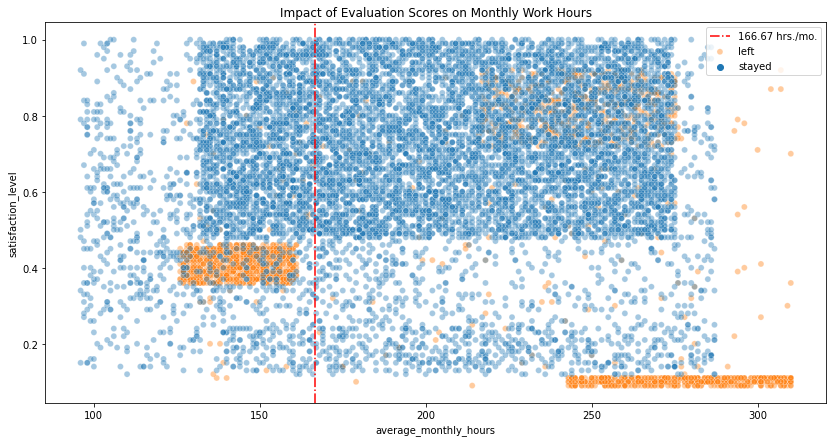

In [18]:
plt.figure(figsize = (14,7))
sns.scatterplot(data = df1,x = 'average_monthly_hours',y='satisfaction_level',hue ='left',alpha = 0.4)
plt.axvline(x = 166.67, color ='red',label ='166.67 hrs./mo.',ls='-.')
plt.legend(labels=['166.67 hrs./mo.','left','stayed'])
plt.title ("Impact of Evaluation Scores on Monthly Work Hours")


The scatterplot reveals:

- A significant group of employees worked 240–315 hours per month, equating to over 75 hours per week annually. Their satisfaction levels were near zero, likely due to overwork.
- Another group with more typical hours still had low satisfaction (~0.4), possibly due to pressure from peers working longer hours.
- A third group worked 210–280 hours per month, with higher satisfaction levels (0.7–0.9).


###### For our next visualization, let's explore how satisfaction levels vary with tenure. This could provide valuable insights into employee experiences over time.


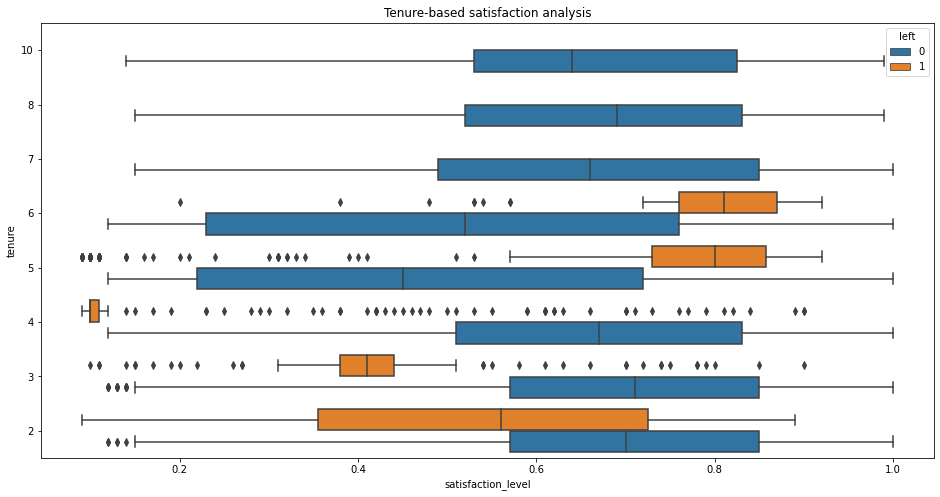

In [19]:
# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
fig, ax = plt.subplots(figsize=(16,8))
sns.boxplot(data=df1, x ='satisfaction_level', y= 'tenure',hue ='left', orient="h",ax=ax)
ax.invert_yaxis()
ax.set_title('Tenure-based satisfaction analysis',fontsize='12')
plt.show()

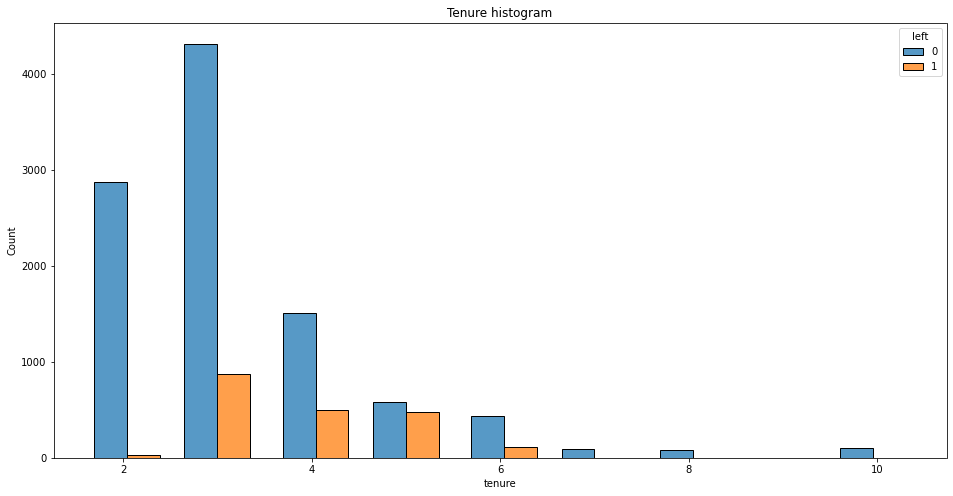

In [20]:
# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
fig, ax = plt.subplots(figsize=(16,8))
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x = 'tenure',hue ='left',multiple='dodge',shrink=8, ax=ax)
ax.set_title('Tenure histogram', fontsize='12')
plt.show()

#### There are several key observations from this plot:

- Employees who left generally fall into two categories: **dissatisfied with shorter tenures** and **very satisfied with medium-length tenures**.
- **Four-year employees** who left have an unusually low satisfaction level. Investigate any policy changes affecting them at this tenure.
- **Longest-tenured employees** did not leave, and their satisfaction levels are similar to newer employees who stayed.
- The histogram indicates relatively few longer-tenured employees, possibly **higher-ranking and higher-paid**.
- Next, calculate the **mean and median satisfaction scores** for employees who left versus those who stayed."
        


In [21]:
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


**Mean** and **median** satisfaction scores of employees who left are lower than those who stayed. Among those who stayed, the **mean satisfaction score** is slightly below the **median**, indicating a **left-skew** in satisfaction levels.


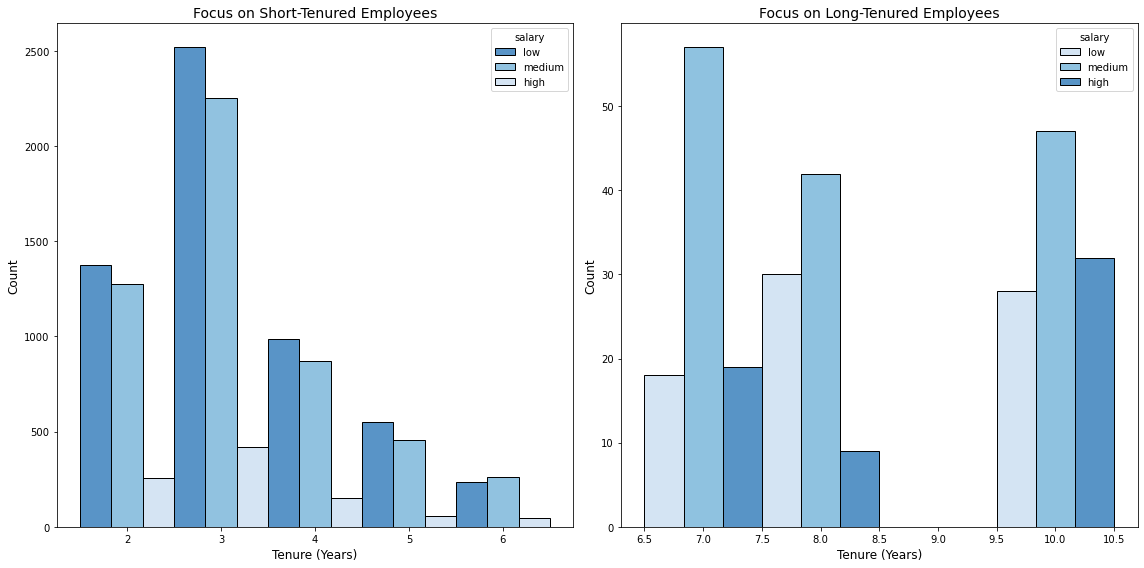

In [22]:
tenure_short = df1[df1['tenure'] < 7]
tenure_long = df1[df1['tenure'] > 6]

# Create subplots for short-tenured and long-tenured employees
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Short-tenured employees
sns.histplot(
    data=tenure_short, 
    x='tenure', 
    hue='salary', 
    multiple='dodge', 
    palette='Blues_r', 
    discrete=True, 
    hue_order=['low', 'medium', 'high'], 
    ax=ax[0]
)
ax[0].set_title('Focus on Short-Tenured Employees', fontsize=14)
ax[0].set_xlabel('Tenure (Years)', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)

# Long-tenured employees
sns.histplot(
    data=tenure_long, 
    x='tenure', 
    hue='salary', 
    multiple='dodge', 
    palette='Blues', 
    discrete=True, 
    hue_order=['low', 'medium', 'high'], 
    ax=ax[1]
)
ax[1].set_title('Focus on Long-Tenured Employees', fontsize=14)
ax[1].set_xlabel('Tenure (Years)', fontsize=12)
ax[1].set_ylabel('Count', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

Subsequently, we will investigate the potential correlation between working long hours and achieving high evaluation scores by creating a scatterplot  of average monthly hours against last evaluation scores

Text(0.5, 1.0, 'Analysis of Monthly Hours Based on Last Evaluation Score')

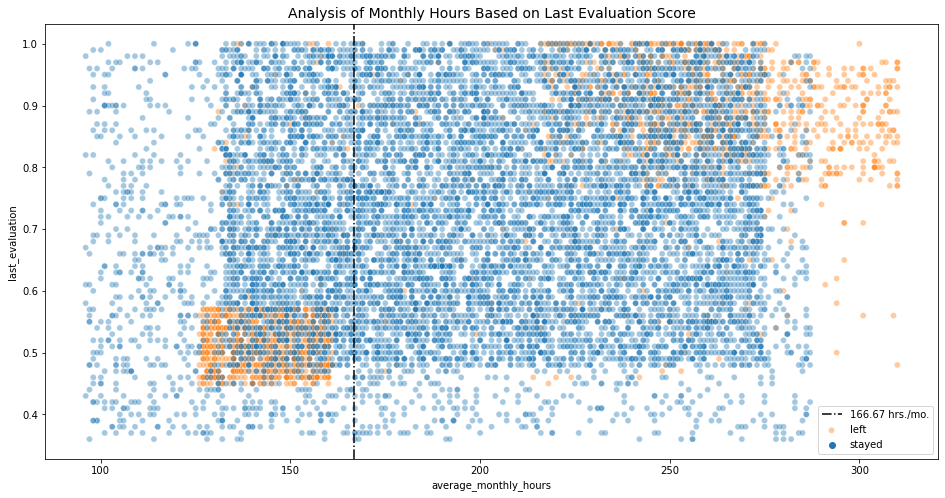

In [23]:
# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(16,8))
sns.scatterplot(data=df1, x= 'average_monthly_hours', y='last_evaluation',hue='left',alpha=0.4)
plt.axvline(x=166.67, color ='black', label = '166.67 hrs./mo.',ls = '-.')
plt.legend(labels=['166.67 hrs./mo.','left','stayed'])
plt.title('Analysis of Monthly Hours Based on Last Evaluation Score', fontsize = '14')

This reveals two groups of employees who left: **overworked employees with high performance** and those working slightly under the **166.67 hours** average with lower scores. There is a correlation between **hours worked** and **evaluation score**, but working long hours doesn't ensure a good score. Most employees work well over **167 hours** per month.
        

Text(0.5, 1.0, 'Monthly hours by promotion last 5 years')

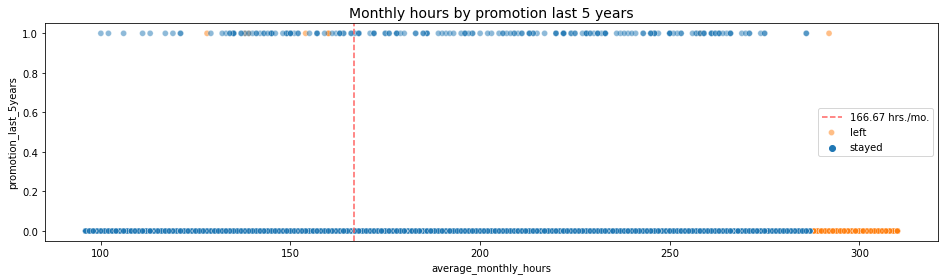

In [24]:
# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16,4))
sns.scatterplot(data=df1, x ='average_monthly_hours',y='promotion_last_5years',hue ='left',alpha = 0.5)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14')

The plot indicates that:

- **Few employees promoted in the last five years** have left.
- **Few employees with the highest hours** were promoted.
- **All employees who left** were among those working the longest hours."

        

In [25]:
# Counts for each department
df1["department"].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

Text(0.5, 1.0, 'Departmental statistics on employee retention and departures.')

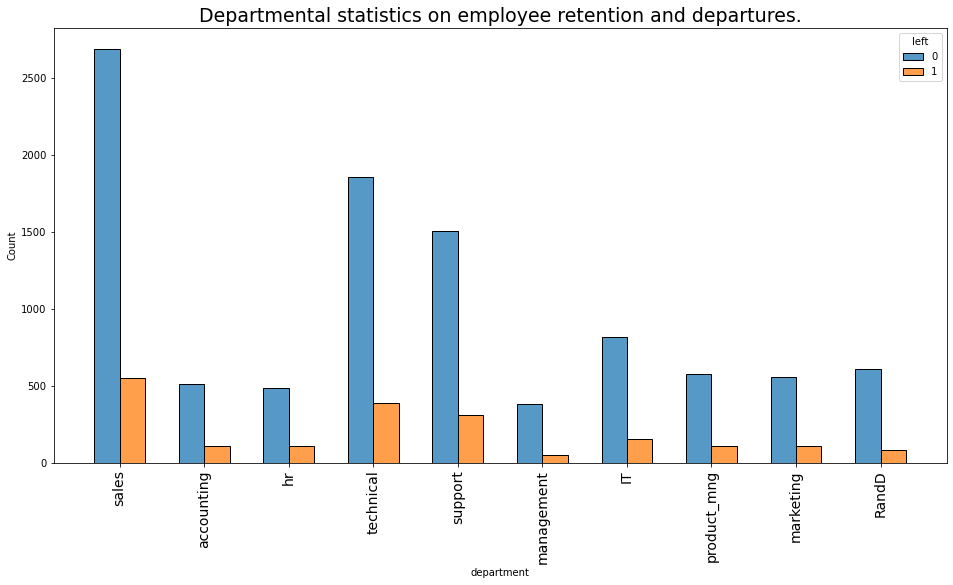

In [26]:
# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize = (16,8))
sns.histplot(data=df1,x="department",hue='left',discrete=1,hue_order=[0,1],multiple='dodge',shrink=0.6)
plt.xticks(rotation='90',fontsize=14)
plt.title("Departmental statistics on employee retention and departures.",fontsize='19')

As there is no as such differences so let's analyze it in more depth.

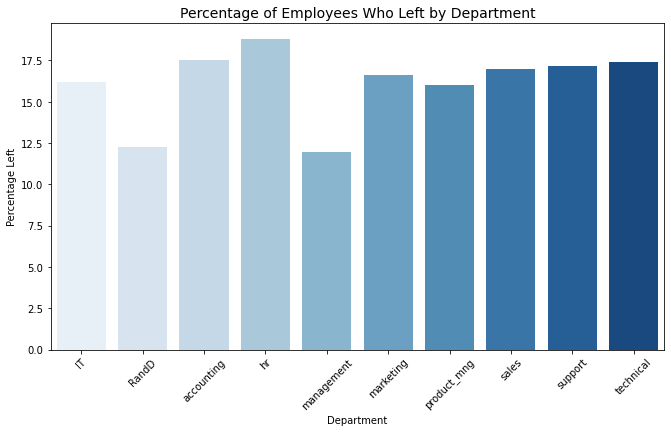

In [27]:
department_stats = df1.groupby('department')['left'].mean().reset_index()
department_stats['percent_left'] = department_stats['left'] * 100

# Plot percentages
plt.figure(figsize=(11, 6))
sns.barplot(data=department_stats, x='department', y='percent_left', palette='Blues')
plt.xticks(rotation=45)
plt.title('Percentage of Employees Who Left by Department', fontsize=14)
plt.ylabel('Percentage Left')
plt.xlabel('Department')
plt.show()



From a data analyst's perspective, the chart shows that **HR, accounting, support, and technical departments** have the **highest attrition rates**, while **R&D and IT departments** have the **lowest**. This indicates that retention strategies should be prioritized for high-attrition departments to address potential issues like job satisfaction or workload.

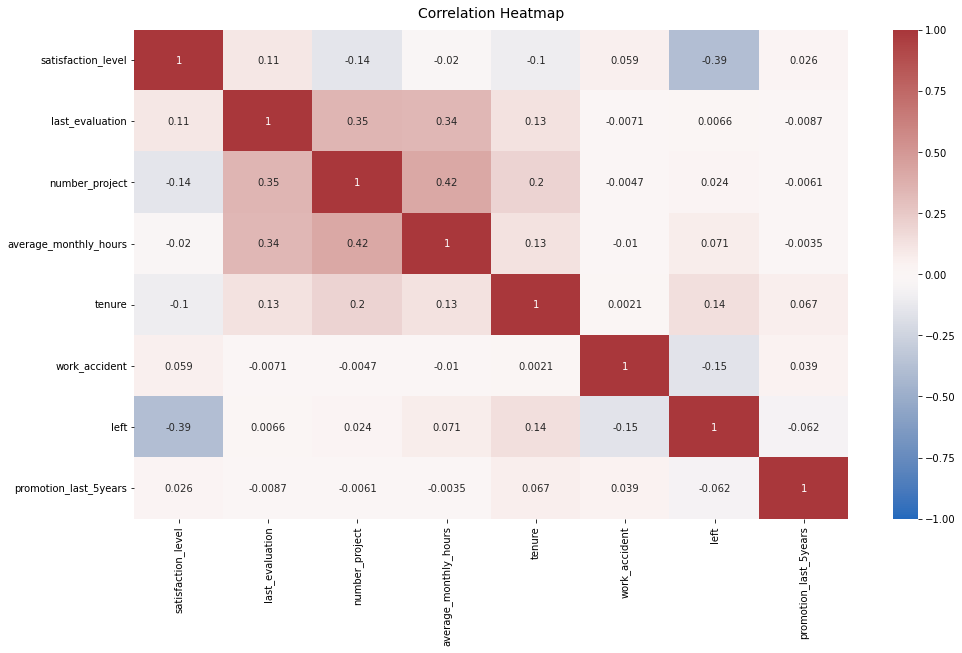

In [28]:
# Correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);


- **Satisfaction Level** has a strong negative correlation with attrition (`left = -0.39`), indicating dissatisfaction is a primary driver of employee turnover.  
- **Tenure** and **work accident** have weak negative correlations with attrition, suggesting minimal influence.  
- **Promotion in the last 5 years** shows a slight negative correlation (`left = -0.062`), indicating lack of promotion might slightly increase attrition.  
- Other variables, like **last evaluation**, **number of projects**, and **average monthly hours**, show weak or no significant correlation with attrition.  

Focus on enhancing satisfaction levels to reduce attrition effectively.

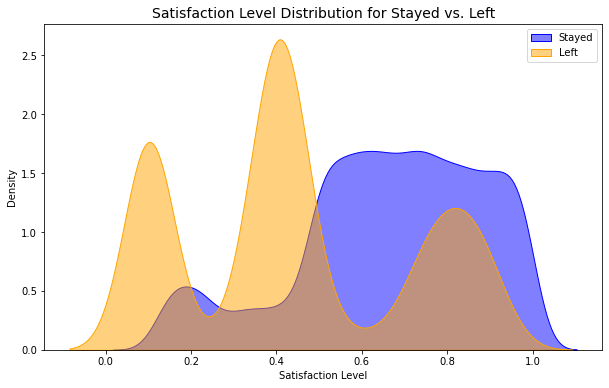

In [29]:
# KDE Plot: Visualizing the distribution of satisfaction levels for employees who stayed (blue) vs. those who left (orange).
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df1[df1['left'] == 0], x='satisfaction_level', fill=True, label='Stayed', color='blue', alpha=0.5)
sns.kdeplot(data=df1[df1['left'] == 1], x='satisfaction_level', fill=True, label='Left', color='orange', alpha=0.5)
plt.title('Satisfaction Level Distribution for Stayed vs. Left', fontsize=14)
plt.xlabel('Satisfaction Level')
plt.ylabel('Density')
plt.legend()
plt.show()


### **Observation:**
1. **Employees Who Left (Yellow Curve):**
   - A large portion of employees who left have **low satisfaction levels (0.2 - 0.5)**.
   - The peak density occurs around **satisfaction levels of 0.4**, indicating dissatisfaction is likely a significant factor in attrition.

2. **Employees Who Stayed (Blue Curve):**
   - Employees who stayed generally have **higher satisfaction levels (0.6 and above)**.
   - The density for satisfaction levels between **0.4 and 0.6 overlaps** for both groups, but the curve for employees who stayed peaks closer to **0.7**, suggesting higher satisfaction correlates with retention.

3. **Overlap Zone:**
   - There is some overlap in the mid-satisfaction range (~0.4 to 0.6), showing that while satisfaction is a strong factor, it may not fully explain all attrition cases.

---

### **Conclusion for Hypothesis 1:**
- **Validated Hypothesis:** Lower satisfaction levels are strongly correlated with higher attrition rates.
- Employees with satisfaction scores below 0.5 are at a higher risk of leaving.
- Higher satisfaction levels (above 0.6) are associated with employee retention.

---

### **Actionable Recommendations:**
1. **Identify At-Risk Employees:**
   - Monitor satisfaction scores closely, particularly for employees scoring below **0.5**.
   - Conduct regular surveys to track satisfaction and take early interventions for low-scoring employees.

2. **Focus on Improving Satisfaction:**
   - Address the factors contributing to dissatisfaction (e.g., workload, pay, management support).
   - Enhance workplace engagement, provide clear growth paths, and improve team morale.

3. **Investigate the Overlap:**
   - Analyze the employees in the overlap zone (0.4–0.6 satisfaction range) to understand additional factors influencing their decision to stay or leave.


## Insights

**Employees are leaving due to poor management**, linked to **long working hours**, **multiple projects**, and **low satisfaction levels**. **Burnout is prevalent**, especially among those not receiving promotions or good evaluations. However, employees with **over six years of tenure** tend to stay.

# PA`C`E: Construct Stage**

This stage focuses on building and refining a robust predictive model tailored to the problem at hand.

### **1. Build a Robust Predictive Model**  
- Focus on constructing a model that addresses the specific business problem effectively.

### **2. Select Appropriate Modeling Techniques**  
- Identify and choose the best modeling methods suited to the data and task.

### **3. Fine-Tune the Model for Optimal Performance**  
- Adjust parameters and features to enhance model accuracy and efficiency.

### **4. Ensure Model Assumptions are Met**  
- Verify that the model adheres to all required assumptions for reliability and validity.

### **5. Evaluate Model Performance**  
- Assess how well the model captures data patterns and produces actionable, meaningful insights.  

This structured approach ensures the model is built, optimized, and validated to provide reliable and impactful results.

### Identifying the Prediction Task

The goal of this task is to predict whether an employee will leave the company. This is a binary classification problem, as the target variable `left` has two possible values: `1` (indicating the employee left) or `0` (indicating the employee stayed). 

### Suitable Models

To solve this problem, appropriate models include **Logistic Regression** or **Tree-based Machine Learning models**. Both approaches can effectively handle categorical outcomes, and we compare their performance to determine the most suitable model.

### 1) Implementing a Logistic Regression Model for Predictive Analysis 


#### Key Notes on Data Preparation for Binomial Logistic Regression 

- **Model Suitability:** Binomial logistic regression is ideal for this task as it focuses on binary classification.  


- **Pre-Splitting Encoding:**  
  - Encode all non-numeric variables before splitting the data for modeling.  
  - Two non-numeric variables in the dataset are:  
    
    1. **Department:**  
       
       - This is a categorical variable.  
       - Use **dummy encoding** to convert it into numerical format suitable for the model.  
    
    2. **Salary:**  
       
       - This is an **ordinal categorical variable** with a clear hierarchy (e.g., low, medium, high).  
       - Instead of dummy encoding, convert the levels into numerical values (e.g., 0 for low, 1 for medium, and 2 for high).  

This approach ensures the data is properly formatted for effective logistic regression modeling.  

In [30]:
# Copy the dataframe
df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary']=(
    df_enc['salary'].astype('category')
    .cat.set_categories(['low','medium','high'])
    .cat.codes
)
# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first= False)
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


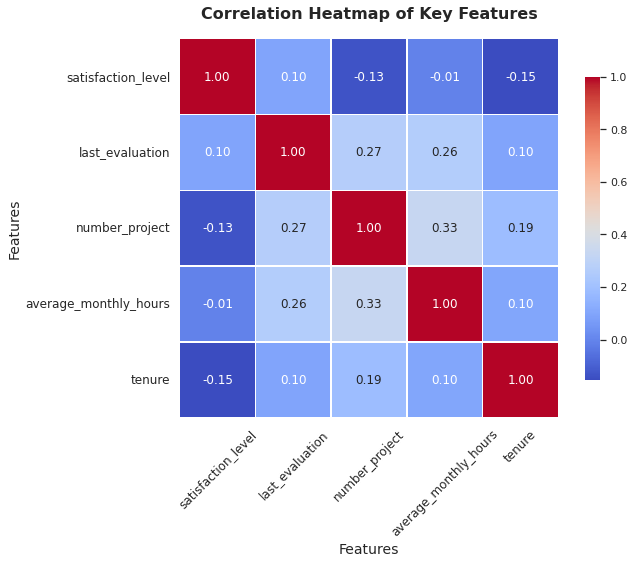

In [31]:
sns.set_theme(style="white")

# Create the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(
    df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 
            'average_monthly_hours', 'tenure']].corr(),  # Correlation matrix
    annot=True,  # Display correlation values
    fmt=".2f",   # Format to 2 decimal places
    cmap="coolwarm",  # Professional and clear colormap
    cbar_kws={'shrink': 0.8, 'aspect': 20},  # Adjust colorbar size
    linewidths=0.5,  # Add gridlines between cells
    square=True  # Make cells square for consistency
)

# Add a title and adjust the labels
plt.title("Correlation Heatmap of Key Features", fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Features", fontsize=14)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

<Figure size 2016x1440 with 0 Axes>

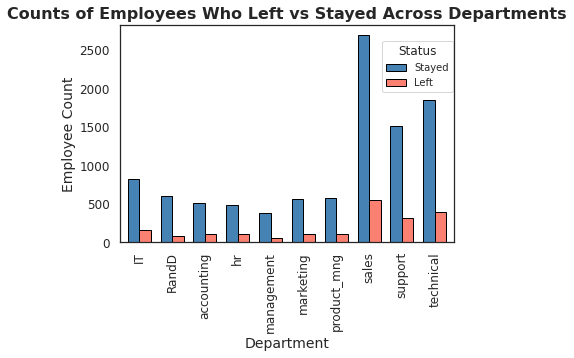

In [45]:
# Group data for the chart
department_counts = pd.crosstab(df1['department'], df1['left'])

# Create the bar chart
plt.figure(figsize=(28, 20))  # Larger size for better zoom-in visuals
department_counts.plot(
    kind='bar',
    width=0.7,
    color=['steelblue', 'salmon'],
    edgecolor='black',
    legend=True
)

# Customize the chart
plt.title("Counts of Employees Who Left vs Stayed Across Departments", fontsize=16, fontweight='bold')
plt.xlabel("Department", fontsize=14)
plt.ylabel("Employee Count", fontsize=14)
plt.xticks(rotation=90, fontsize=12)  # Rotated text
plt.yticks(fontsize=12)

# Add legend
plt.legend(
    ["Stayed", "Left"], 
    title="Status", 
    title_fontsize=12, 
    fontsize=10, 
    loc='upper left',  # Move legend inside the graph
    bbox_to_anchor=(0.77, 0.95)  # Fine-tuned position
)
# Optimize layout and show

plt.show()


Given that logistic regression models can be significantly affected by extreme values, we should clean the data by eliminating the previously detected outliers in the tenure column to ensure more accurate and reliable results.

In [46]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['tenure']>=lower_limit) & (df_enc['tenure']<=upper_limit)]
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [47]:
# Isolate the outcome variable
y = df_logreg['left']
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

The `'left'` column is dropped because it is the `target variable` we want to predict. Keeping it in the feature set (`X`) would cause data leakage, leading to incorrect model training.

In [48]:
# Select the features you want to use in your model
x = df_logreg.drop('left', axis=1)
x.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


Divide the dataset into two parts: a training set for teaching the model and a testing set for evaluating its performance.  Because the categories in your data (represented by 'y') are `imbalanced`, ensure this split maintains the same class proportions in both the training and testing sets. This is called stratified sampling and helps prevent biased model training.


In [49]:
# Split the data into training set and testing set
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,stratify=y, random_state=42)

In [50]:
#Construction of logistic regression model and fit it to the training dataset
log_class = LogisticRegression(random_state =42,max_iter=500).fit(x_train,y_train)

In [51]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_class.predict(x_test)

It's time to visualize confusion matrix of Logistic regression model

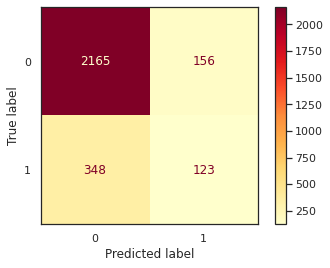

In [52]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test,y_pred, labels=log_class.classes_)
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,display_labels=log_class.classes_)
log_disp.plot(values_format='',cmap='YlOrRd')
plt.show()

A **confusion matrix** visually represents the performance of a classification model. 


The upper-left quadrant displays the number of true negatives.
The upper-right quadrant displays the number of false positives.
The bottom-left quadrant displays the number of false negatives.
The bottom-right quadrant displays the number of true positives.


* **True Positives (TP)**: Correctly predicted positives.
* **True Negatives (TN)**: Correctly predicted negatives.
* **False Positives (FP)**: Incorrectly predicted positives (Type I error).
* **False Negatives (FN)**: Incorrectly predicted negatives (Type II error).

**A perfect model would have only TP and TN values, with zero FP and FN.** 


In [53]:
df_logreg['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64


* **Class Imbalance:** The data shows an approximate 83%-17% split between classes. 
* **Severity:** While not perfectly balanced, this level of imbalance is not severe enough to warrant immediate action.
* **Recommendation:**  You can proceed with model evaluation without modifying the class balance. 
* **Future Consideration:**  If the imbalance was more pronounced, resampling techniques could be employed to create a more balanced dataset. 


In [54]:
# Classification report for logistic regression model
target_names =['Predicted would not leave','Predicted would leave']
print(classification_report(y_test,y_pred,target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792




* **Overall Performance:** The logistic regression model shows promising overall performance with:
    * precision 79%
    * recall    82% 
    * F1-score  80% 
    * accuracy  82% 
* **Predicting Employee Attrition:**  While the overall performance is good, the model struggles to accurately identify employees who are likely to leave. This indicates that further optimization is needed, especially if predicting attrition is a primary goal. 



### 2)  Implementing Tree-Based Models: Decision Tree & Random Forest


In [55]:
# Isolate the outcome variable
y = df_enc['left']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [56]:
# Select the features
x = df_enc.drop('left', axis=1)
x.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=0)

### Round 1) Decision Tree
Find the best performing decision tree model by using cross-validation to comprehensively search for the optimal model parameters.

In [58]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)
# Assign a dictionary of hyperparameters to search over
cv_params={'max_depth':[4,6,8,None],
           'min_samples_leaf':[2,5,1],
           'min_samples_split':[2,4,6]
            }
# Assign a dictionary of scoring metrics to capture
scoring ={'accuracy','precision','recall','f1','roc_auc'}
tree1 = GridSearchCV(tree, cv_params, scoring=scoring,cv=4,refit='roc_auc')

Let's fit decision tree model to training data

In [59]:
%%time 
tree1.fit(x_train,y_train )

CPU times: user 2.95 s, sys: 0 ns, total: 2.95 s
Wall time: 2.95 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [60]:
# Check best parameters
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [61]:
# Check best AUC score 
tree1.best_score_

0.969819392792457

This model demonstrates `strong predictive ability`, as evidenced by the high AUC score, suggesting it is effective at identifying employees likely to leave.


In [62]:
def make_results(model_name: str, model_object, metric: str):

    metric_mapping = {
        'auc': 'mean_test_roc_auc',
        'precision': 'mean_test_precision',
        'recall': 'mean_test_recall',
        'f1': 'mean_test_f1',
        'accuracy': 'mean_test_accuracy'
    }

    cv_results = pd.DataFrame(model_object.cv_results_)
    best_index = cv_results[metric_mapping[metric]].idxmax()
    best_results = cv_results.loc[best_index]

    return pd.DataFrame({
        'model': [model_name],
        'precision': [best_results.mean_test_precision],
        'recall': [best_results.mean_test_recall],
        'F1': [best_results.mean_test_f1],
        'accuracy': [best_results.mean_test_accuracy],
        'auc': [best_results.mean_test_roc_auc]
    })



In [63]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.914552,0.916949,0.915707,0.971978,0.969819



**Our decision tree model shows strong performance based on these scores.**  This is great news, but remember: **decision trees can sometimes overfit the data, meaning they don't generalize well to new information.**

**To address this, let's explore a random forest model.** Random forests combine multiple decision trees, which helps **prevent overfitting** and leads to more robust and reliable predictions. 


### Round 1) Random Forest

In [64]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)
cv_params = {'max_depth':[3,5,None],             
             'max_samples':[0.7,1.0],
             'max_features':[1.0],             
             'min_samples_split':[2,3,4],  
             'min_samples_leaf':[1,2,3],
             'n_estimators':[300,500],    
            }

scoring = {'accuracy','precision','recall','f1','roc_auc'}
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [65]:
%%time 
rf1.fit(x_train, y_train)

CPU times: user 9min 25s, sys: 0 ns, total: 9min 25s
Wall time: 9min 25s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [66]:
# Path to to save the model
path = '/home/jovyan/work/'

In [67]:
#This block of code to pickle the model and read in the model.
def write_pickle(path,model_object,save_as:str):
    with open(path + save_as + '.pickle','wb') as to_write:
        pickle.dump(model_object,to_write)

In [68]:
# This block of code to save the model in a pickle file and then read it in.
def read_pickle(path,saved_model_name:str):
    with open(path + saved_model_name + '.pickle','rb') as to_read:
        model = pickle.load(to_read)
    return model 

In [69]:
write_pickle(path,rf1,'hr_rf1')

In [70]:
rf1= read_pickle(path,'hr_rf1')

In [71]:
#Best AUC score on CV
rf1.best_score_

0.9804250949807172

In [72]:
#Check best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [73]:
#Retrieve the training set performance metrics for both the Decision Tree and Random Forest models.
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425



* **Random Forest Outperforms Decision Tree:** The random forest model consistently shows better performance than the decision tree model across most metrics we looked at.
* **Minor Recall Difference:** While the random forest model has a slightly lower recall score, this difference is small and doesn't change the overall conclusion. 
* **Overall Superiority of Random Forest:** The random forest model is the clear winner in this comparison. 


In [74]:
def get_score(model_name:str,model,x_test_data,y_test_data):
    
    preds=model.best_estimator_.predict(x_test_data)
    
    accuracy = accuracy_score(y_test_data,preds)
    precision = precision_score(y_test_data,preds)
    recall = recall_score(y_test_data,preds)
    f1 = f1_score(y_test_data,preds)
    auc= roc_auc_score(y_test_data,preds)
    
    table= pd.DataFrame({ 'model':[model_name],
                         'precision':[precision],
                         'recall' : [recall],
                         'accuracy':[accuracy],
                         'auc': [auc]    
                        })
    
    return table 

In [75]:
# Predictions on test data
rf1_test_score = get_score('random forest1',rf1,x_test,y_test)
rf1_test_score

,model,precision,recall,accuracy,auc
0,random forest1,0.964211,0.919679,0.980987,0.956439


Our model is performing well! The scores from our final test are very close to the scores from our earlier validation checks. This consistency gives us confidence that the model won't significantly decline in performance when it encounters completely new data.

### Importance of Feature Engineering  

Feature engineering is essential to address **data leakage**, which occurs when unintended information influences the model during training. This leads to unrealistically high evaluation scores that won’t hold in production.  

In this case, the `satisfaction_level` feature may be unreliable or unavailable for real-world predictions, and `average_monthly_hours` could introduce leakage. Employees about to quit or flagged for layoffs may already be working fewer hours, indirectly linking this feature to the target variable (`left`).  

To mitigate these issues, we refine the model by dropping `satisfaction_level` and creating a new binary feature called `overworked`, indicating whether an employee works excessive hours. This approach ensures robust, meaningful features that enhance real-world model performance.  

In [76]:
# Drop `satisfaction_level` and save resulting dataframe in new variable
df2 = df_enc.drop('satisfaction_level',axis=1)
df2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [77]:
# Create `overworked` column. For now, it's identical to average monthly hours.
df2['overworked'] = df2['average_monthly_hours']

print('Max hours:', df2['overworked'].max())
print('Min hours', df2 ['overworked'].min())

Max hours: 310
Min hours 96



**1. Calculating Average Monthly Hours:**

* Assuming a standard work schedule of 5 days a week, 8 hours a day, for 50 weeks in a year, the average monthly hours come out to be approximately 166.67. 

**2. Defining "Overworked"**:

* For our analysis, we'll consider anyone consistently working more than 175 hours per month as "overworked".

**3. Creating a Binary "Overworked" Indicator:**

* To easily identify overworked individuals in our data, we'll create a new column called 'overworked'.
* This column will use a simple True/False system:
    *  "True" (represented as 1) if the person's monthly hours exceed 175.
    *  "False" (represented as 0) if their monthly hours are 175 or less.

**In simpler terms**, we're using a threshold of 175 hours to flag individuals who are potentially overworked based on their average monthly work time. 


In [78]:
# Define `overworked` as working > 175 hrs/week
df2['overworked'] = (df2['overworked']>175).astype(int)
df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

In [79]:
# Drop average_monthly_hours column
df2=df2.drop('average_monthly_hours',axis=1)
df2.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


Isolate the outcome variable

In [80]:
# Isolate the outcome variable
y = df2['left']
x = df2.drop('left',axis=1)

In [81]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.25, stratify=y, random_state=0)

## Round 2) Decision Tree

In [82]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [83]:
%%time
tree2.fit(x_train,y_train)

CPU times: user 2.43 s, sys: 0 ns, total: 2.43 s
Wall time: 2.42 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [84]:
# Best params
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [85]:
# Check best AUC score on CV
tree2.best_score_

0.9586752505340426

In [86]:
# Get all CV scores
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)


              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675



"As anticipated, **reducing the number of features used in this iteration of the model has led to a slight decrease in certain performance metrics.** This is a natural consequence of using a less complex model. **However, it's important to note that the scores remain highly satisfactory**, indicating that the model **still demonstrates strong predictive capabilities despite the reduced feature set.**"


## Round 2) Random Forest

In [87]:
# Instantiate model
rf = RandomForestClassifier(random_state = 0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

scoring = {'accuracy','precision','recall','f1','roc_auc'}
rf2 = GridSearchCV(rf, cv_params, scoring = scoring, cv=4, refit ='roc_auc')

In [88]:
%time
rf2.fit(x_train, y_train)

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 13.8 µs


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [89]:
# Write pickle
write_pickle(path,rf2,'hr_rf2')

In [90]:
# Read in pickle
rf2 = read_pickle(path, 'hr_rf2')

In [91]:
# Check best params
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [92]:
# Check best AUC score on CV
rf2.best_score_

0.9648100662833985

In [93]:
# Get all CV scores
rf2_cv_results = make_results('random forest cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675
              model  precision    recall        F1  accuracy      auc
0  random forest cv   0.866758  0.878754  0.872407  0.957411  0.96481



* **Random Forest performs better than Decision Tree in AUC (Area Under the Curve).** This means Random Forest is better at distinguishing between classes, leading to better classification performance.
* **Random Forest generalizes better than Decision Tree due to its ensemble nature.**  Ensemble methods like Random Forest combine multiple decision trees, reducing overfitting and improving generalization to new data. 


In [94]:
# Get predictions on test data
rf2_test_scores = get_score('random forest2 test', rf2, x_test, y_test)
rf2_test_scores

,model,precision,recall,accuracy,auc
0,random forest2 test,0.870406,0.903614,0.961641,0.938407


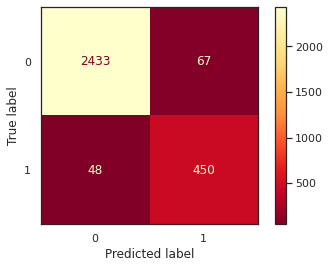

In [95]:
# Compute values for confusion matrix
preds = rf2.best_estimator_.predict(x_test)
cmf = confusion_matrix(y_test, preds, labels = rf2.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cmf,display_labels= rf2.classes_)
display.plot(values_format='',cmap='YlOrRd_r')


* **The model has a higher rate of false positives than false negatives.**  This means it's more likely to predict an employee is at risk when they're not (false positive), compared to missing employees who are actually at risk (false negative).
* **This could lead to misidentifying employees as potential risks.** This has ethical and practical implications, as it could unfairly impact an employee's standing.
* **Despite this, the model is considered strong.** This suggests the overall performance is good, and the high false positive rate might be acceptable depending on the specific context and the costs associated with false positives vs. false negatives. 


Let's do the visual part as it's going to help us in:  

* **Inspecting the Splits:** This means examining each decision point in your flowchart (each node in the tree) and understanding what criteria it's using to split the data. 
* **Important Features in Random Forest:** Now, imagine you have a bunch of these decision trees working together (that's a Random Forest). We can find out which factors (features) are most influential across all those trees.

By doing this, we're not just blindly trusting the model. We can:

* **Interpret:**  Make sense of the model's logic.
* **Debug:**  Identify any potential errors or biases.
* **Validate:** Check if the model is making decisions based on what we expect.
* **Transparency & Explainability:**  This allows us to explain clearly how the model works, which is important for trust and accountability. 


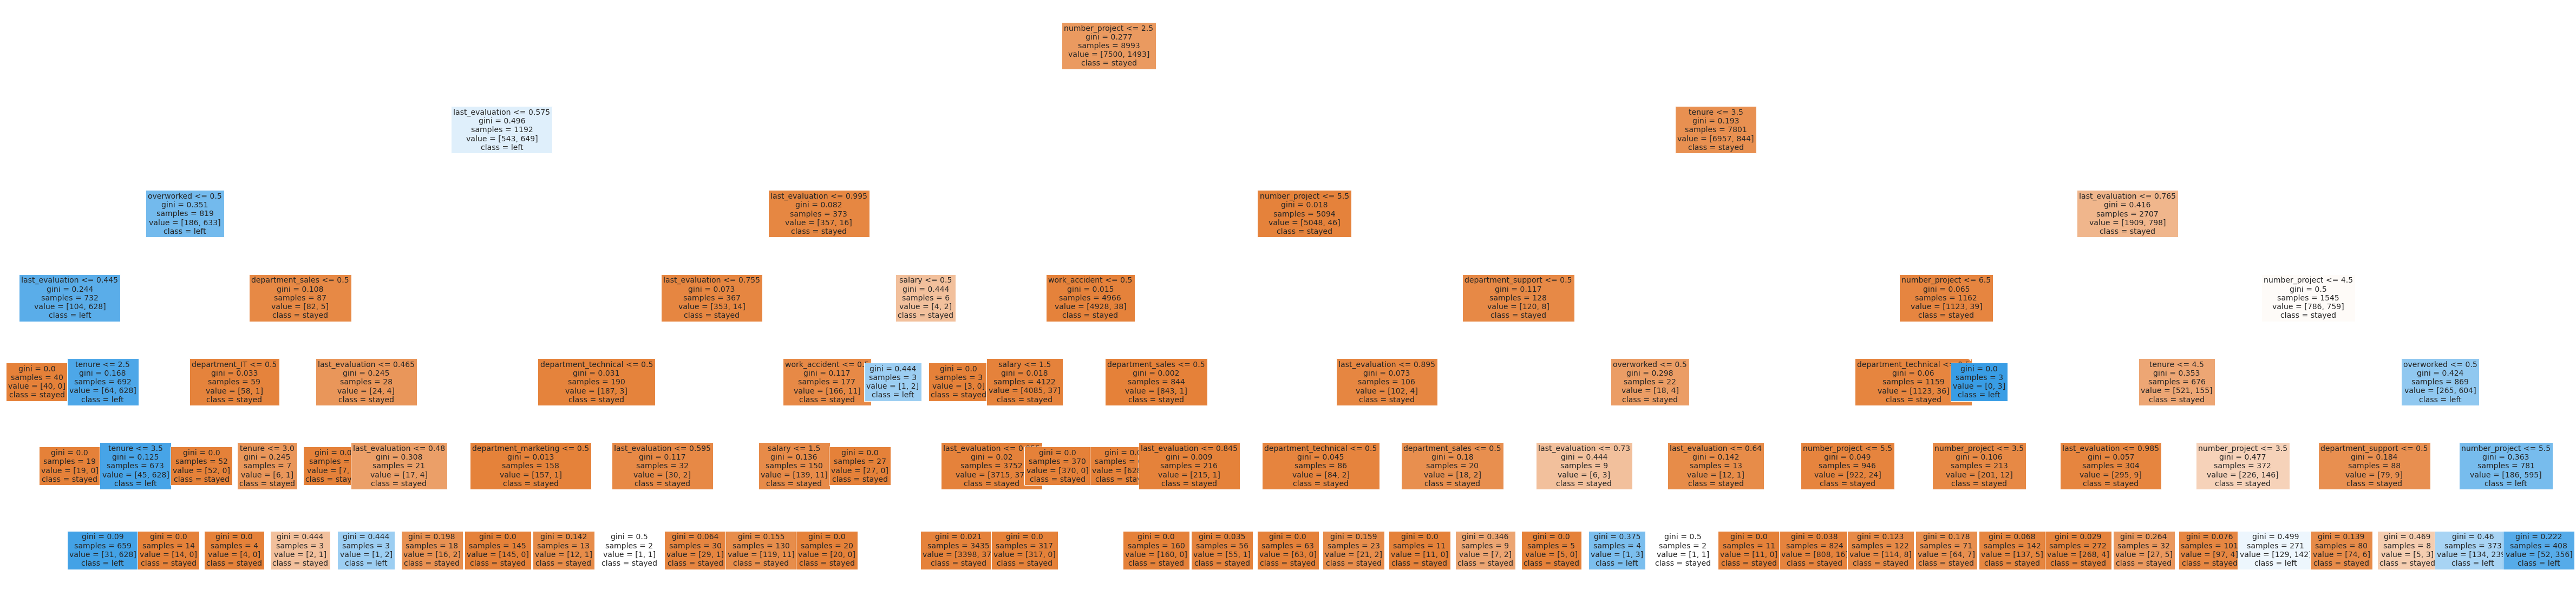

In [110]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=x.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

Kindly zoom in for better understanding. 

### Feature importance

Feature importance identifies key variables impacting model predictions, improving interpretability. It simplifies models by removing low-importance features, reducing overfitting, and enhancing performance. It provides actionable business insights by highlighting critical factors influencing outcomes. Additionally, it helps validate data quality by flagging unexpected low-importance features.

#### Decision tree feature importance

In [111]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=x.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
last_evaluation,0.343958
number_project,0.343385
tenure,0.215681
overworked,0.093498
department_support,0.001142
salary,0.000910
department_sales,0.000607
department_technical,0.000418
work_accident,0.000183
department_IT,0.000139


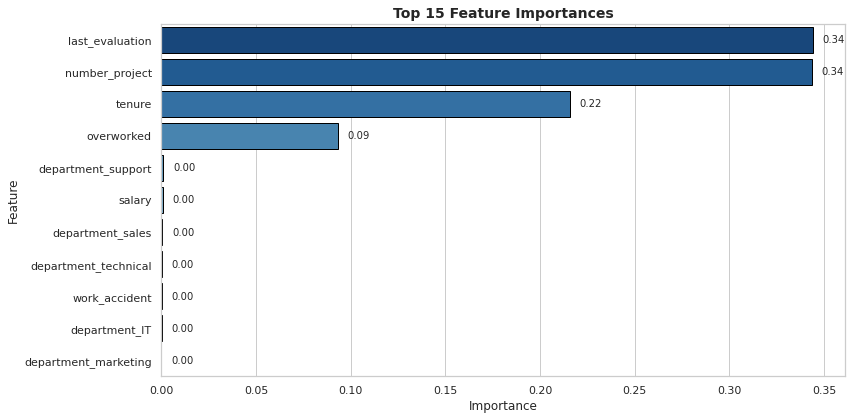

In [112]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create the bar plot
ax = sns.barplot(
    data=tree2_importances.head(15),  # Top 15 features
    x="gini_importance", 
    y=tree2_importances.index[:15],
    palette="Blues_r",  # Clean and professional gradient
    edgecolor="black"  # Border around bars
)

# Annotate bars with values
for i, value in enumerate(tree2_importances['gini_importance'].head(15)):
    ax.text(value + 0.005, i, f'{value:.2f}', va='center', fontsize=10)

# Add a title and labels
plt.title("Top 15 Feature Importances", fontsize=14, fontweight='bold')
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

"By examining the bar plot, we can see which factors are most influential in predicting employee attrition (whether an employee left the company). The length of time since the last performance evaluation (`last_evaluation`), the number of projects an employee is involved in (`number_projects`), their tenure at the company (`tenure`), and their perceived level of being overworked (`overworked`) are the strongest predictors, listed in order of importance." 


#### Random forest feature importance

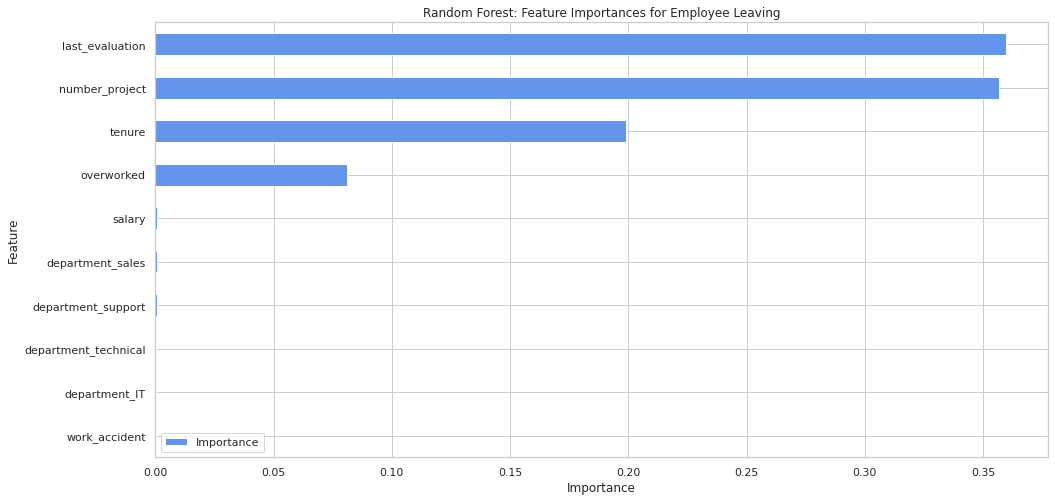

In [114]:
# Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = x.columns[ind]
# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance",color ='CornflowerBlue')
ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")
plt.show()

By analyzing the importance of features in our random forest model, we can see that `'last_evaluation'`, `'number_project'`, `'tenure'`, and `'overworked'` are the most influential factors in predicting employee churn (represented by the 'left' variable).  

It's interesting to note that **these key predictors are consistent** with those identified by our simpler decision tree model, highlighting their strong relationship with employee attrition.

# PAC`E`: Execute Stage

This stage focuses on interpreting model results and sharing actionable steps with stakeholders.

### **1. Analyze Model Performance**  
- Evaluate key metrics (accuracy, precision, recall, F1-score, AUC) to assess model effectiveness.

### **2. Highlight Key Insights**  
- Identify how critical features influenced model outcomes and business trends.

### **3. Develop Actionable Recommendations**  
- Provide practical steps for stakeholders to improve business outcomes based on model findings.

### **4. Create Engaging Visualizations**  
- Use graphs, charts, and dashboards to clearly convey insights to stakeholders.

### **5. Communicate Results Effectively**  
- Present concise, business-focused summaries of insights and recommendations tailored to stakeholder needs.  


## Results and Evaluation  

This section outlines the key steps taken to interpret, evaluate, and present the model's performance in a clear and actionable manner.  

### **1. Model Interpretation**  
- Analyze the model's predictions to understand how different features influence outcomes.  
- Highlight the most important features driving the model's decisions.  
- Provide intuitive explanations for the model's behavior to ensure clarity for all stakeholders.  

### **2. Model Performance Evaluation**  
- Assess the model's effectiveness using key performance metrics such as:  
  - **Accuracy**: Measure of overall correctness.  
  - **Precision**: Focus on reducing false positives.  
  - **Recall**: Ensure critical cases are captured.  
  - **F1-Score**: Balance precision and recall for a holistic view.  
  - **AUC (Area Under Curve)**: Evaluate the model's ability to distinguish between classes.  

- Compare model performance across training and test datasets to ensure robustness and avoid overfitting.  

### **3. Results Presentation and Stakeholder Communication**  
- Create **engaging visualizations** (e.g., bar charts, heatmaps, or ROC curves) to showcase:  
  - Model predictions.  
  - Feature importances.  
  - Performance comparisons across models.  

- Summarize findings in actionable insights, tailored for stakeholder understanding. Examples include:  
  - Identifying specific areas of concern.  
  - Suggesting data-driven strategies to improve outcomes.  

- Propose next steps based on model results to ensure continuous improvement and alignment with business goals.  

By delivering results in this structured and visually appealing manner, the insights become actionable, accessible, and impactful for decision-making.

### Summary of Model Performance

The performance of the models on the test set is summarized below:  

#### **Logistic Regression**  
- The logistic regression model achieved the following results:  
  - **Precision**: 80% (weighted average)  
  - **Recall**: 83% (weighted average)  
  - **F1-Score**: 80% (weighted average)  
  - **Accuracy**: 83%  

While the model showed balanced performance, there is room for improvement in terms of predictive power.  

#### **Tree-Based Machine Learning Models**  
- After applying feature engineering techniques, tree-based models demonstrated superior performance compared to logistic regression.  

**Decision Tree Model:**  
- **Area Under the Curve (AUC)**: 93.8%  
- **Precision**: 87.0%  
- **Recall**: 90.4%  
- **F1-Score**: 88.7%  
- **Accuracy**: 96.2%  

**Random Forest Model:**  
- The random forest model marginally outperformed the decision tree model, showcasing better generalization capabilities.  

These results highlight the effectiveness of tree-based models in leveraging engineered features to improve predictive accuracy and overall model performance.

## Conclusion, Recommendations, and Next Steps  

The analysis and model results indicate a significant issue with employee overwork at the company. The insights from the models and feature importance analysis provide a clear direction for action to improve employee retention and satisfaction.  

### **Recommendations for Stakeholders**  
To address the identified challenges, the following recommendations are proposed:  

1. **Cap Project Workload:**  
   - Limit the number of projects an employee can handle simultaneously to reduce stress and improve work-life balance.  

2. **Address Tenure-Related Dissatisfaction:**  
   - Investigate why employees with around four years of tenure show lower satisfaction.  
   - Consider recognizing their contributions through promotions or tailored incentives to improve morale.  

3. **Reassess Work Hours:**  
   - Either reward employees for working longer hours or eliminate the expectation for excessive overtime.  
   - Ensure fair compensation for additional efforts and avoid burnout.  

4. **Clarify Policies on Overtime and Workload:**  
   - Inform employees about overtime pay policies and ensure these policies are well-communicated.  
   - Clearly define workload expectations and time-off policies to set realistic boundaries.  

5. **Promote Open Communication:**  
   - Conduct company-wide and team-specific discussions to identify and address concerns about work culture.  
   - Foster an inclusive environment where employees feel heard and valued.  

6. **Revamp Evaluation Metrics:**  
   - Avoid tying high evaluation scores solely to employees who log 200+ work hours per month.  
   - Introduce a proportionate evaluation system that rewards effort and contribution across the board.  

### **Next Steps**  
To refine the analysis and address potential data concerns, the following actions are recommended:  

1. **Examine Data Leakage Concerns:**  
   - Investigate how the removal of the `last_evaluation` feature impacts model predictions.  
   - Determine whether infrequent evaluations influence the retention decision, and consider developing retention models without this feature.  

2. **Explore Alternative Prediction Goals:**  
   - If `last_evaluation` or `satisfaction_level` strongly determines retention, pivot to predict these scores instead of retention.  
   - This approach could uncover actionable insights for performance and satisfaction improvement.  

3. **Cluster Analysis with K-Means:**  
   - For further exploration, implement a K-means clustering model on the dataset.  
   - Analyze the clusters to identify patterns in employee behavior, satisfaction, and retention risks, providing a fresh perspective for targeted interventions.  

By implementing these recommendations and next steps, the company can proactively address retention challenges, foster a healthier work environment, and enhance employee satisfaction and performance.